# Gradient Descent Implementation

Consolidate your implementations of the gradient descent algorithm here.  Try to combine the best features of all of your individual preclass work.  As you work through the code, be sure to raise any confusions you had when writing the gradient descent / line searching code with your group members, and attempt to resolve these within your groups.  If there are any confusions outstanding, be sure to list these down for discussion after the breakout.  You may want to include an iteration limit in the loop for the gradient descent.  Some templates are provided for the function and its gradient, but feel free to modify these as you see fit!

Once you have consolidated your implementations, use your implementation to find the minimum of the Rosenbrock function:
    $f(x,y) = (1-x)^2 + 100(y-x^2)^2$,
to a tolerance of $|x_{k+1} - x_{k}| \leq 1\times10^{-6}$.  Use this tolerance for the line search interval size also.  Experiment with the following:

1. Try optimizing first without any line search.  That is, use a fixed proportion of the gradient as a step size in the descent direction at each step.  Record your observations for different step sizes and starting points.  Is there a step size that leads the algorithm to diverge?
2. Add in the line search with bisection and evaluate the effect.  Is there an improvement in convergence?


In [2]:
import numpy as np
# Taha
# The Newton Method applied to Rosenbrock function

f = lambda x: 10*(x[1] - x[0]**2)**2 + (x[0] - 1)**2
grad_f = lambda x: [2*(x[0]-1) + 200*(x[1] - x[0]**2)*(-2*x[0]), 200*(x[1]-x[0]**2)]
hessian_f = lambda x: [[1200*x[0]**2-400*x[1]+2, -400*x[0]], [-400*x[0], 200]]

x1 = np.array([])
x2 = np.array([])
x = np.array([-.8,1])
tol = np.inf
k = 0
step = 1

while tol >= 1e-7:
    hessian_inv = np.linalg.inv(hessian_f(x))
    x_new = x - step * np.matmul(hessian_inv, grad_f(x))
    x1 = np.append(x1, x_new[0])
    x2 = np.append(x2, x_new[1])
    print(x_new)
    tol = np.linalg.norm(x_new - x, 2)
    x = x_new
    k+=1

print("\nFunction Value: ", f(x), "\nAt X = ", x, " after", k, "iterations")

[-0.82535211  0.68056338]
[ 0.79208505 -1.98870424]
[0.79248166 0.62802703]
[0.99999347 0.95692579]
[0.99999415 0.9999883 ]
[1. 1.]
[1. 1.]

Function Value:  0.0 
At X =  [1. 1.]  after 7 iterations


In [0]:
# Kosyo
def newton_method(func, func_grad, func_hess, use_alpha=False, max_steps=1000, eps=1e-6):
    # usually we can choose at random but we are given a value now
    x = np.array([[-0.8], [1]])
    alpha = 1
    results = []

    for _ in range(max_steps):
        results.append(x)
        # calculate direction with the Hessian and gradient
        direction = np.matmul(-1 * np.linalg.inv(func_hess(x)), func_grad(x))

        # check if x changes significantly
        if len(results) >= 2 and np.abs(np.sum(x - results[-2])) < eps:
            return results

        # calculate step size
        if use_alpha:
            alpha = backtrack_line_search(func, func_grad, x, direction)

        # make a step in the direction of steepest descend
        x = x + alpha*direction

    return results


def backtrack_line_search(func, func_grad, x, direction, alpha=1e-4, beta=0.9, eps=1e-6):
    # get the one of the components needed to calculate the slope
    d_slope = np.dot(func_grad(x).T, direction)

    # init step size
    step_size = 1.0

    # loop until we meet the armijo condition
    while func(x + step_size * direction) > func(x) + step_size * alpha * d_slope:
        step_size *= beta
        
        if step_size * np.linalg.norm(direction) < eps:
            break

    return step_size

In [1]:
# Yoav
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Optimization functions
def gradient_descent_solver(f, grad_f, x_0, step_cap, epsilon, \
                            line_search_step_cap, line_search_epsilon, \
                            newton_step = None, uniform_alpha = None):
    
    x = x_0
    steps = [x]

    for k in range(0,step_cap):
        # Check for completion
        grad = grad_f(x)
        if np.abs(np.sum(grad)) <= epsilon:
            break
        # Determine descent direction
        if newton_step:
            d = -newton_step(x)
        else:
            d = -grad #/np.linalg.norm(grad)
        # Determine step size
        if uniform_alpha:
            alpha = uniform_alpha
        else:
            alpha = exact_line_search(grad_f,x,d,line_search_step_cap,line_search_epsilon)
        # Update
        x = x+alpha*d
        steps.append(x)

    return steps

def exact_line_search(grad_f,x,d,line_search_step_cap,line_search_epsilon):

    h_prime = lambda a : np.dot(grad_f(x+a*d).T,d)

    # Initial guess
    alpha_l = 0
    alpha_u = 1
    for s in range(0,line_search_step_cap):
        if h_prime(alpha_u) <= 0:
            alpha_u = 2*alpha_u

    # Bisection
    for s in range(0,line_search_step_cap):
        # Test alpha_hat
        alpha_t = (alpha_u+alpha_l)/2
        test = h_prime(alpha_t)
        # Check for completion
        if np.abs(test) <= line_search_epsilon:
            break
        # Update
        elif test > 0:
            alpha_u = alpha_t
        elif test < 0:
            alpha_l = alpha_t

    return alpha_t

In [3]:
# # Example function

# Q = np.array([[20,5],[5,2]])
# q = np.array ([[14],[6]])
# c = 10

# def f(x):
#     return 0.5*np.dot(np.dot(x.T,Q),x)-np.dot(q.T,x)+c

# def grad_f(x):
#     return np.dot(Q,x)+q

# def hess_f(x):
#     return Q

# def newton_step(x):
#     return np.matmul(np.linalg.inv(hess_f(x)),grad_f(x))

In [9]:
# Rosenbrock function

# def f(x):
#     return 10*(x[1]-x[0]**2)**2 + (x[0]-1)**2

# def grad_f(x):
#     return np.array([40*x[0]**3-40*x[0]*x[1]+2*x[0]-2,20*(x[1]-x[0]**2)])

# def hess_f(x):
#     return np.array([[-40*(x[1]-x[0**2])+80*x[0]**2+2,-40*x[0]],[-40*x[0],20]],dtype='float')

f = lambda x: 10*(x[1] - x[0]**2)**2 + (x[0] - 1)**2
grad_f = lambda x: np.array([2*(x[0]-1) + 200*(x[1] - x[0]**2)*(-2*x[0]), 200*(x[1]-x[0]**2)], dtype='float')
hess_f = lambda x: np.array([[1200*x[0]**2-400*x[1]+2, -400*x[0]], [-400*x[0], 200]], dtype='float')

def newton_step(x):
    return np.matmul(np.linalg.inv(hess_f(x)),grad_f(x))

In [16]:
# Optimization
x_0 = np.array([[-0.8],[1]])
step_cap = 1000
epsilon = 1e-6
line_search_step_cap = 1000
line_search_epsilon = 1e-6

steps = gradient_descent_solver(f,grad_f,x_0,step_cap,epsilon,\
                                line_search_step_cap,line_search_epsilon,\
                                newton_step,1)

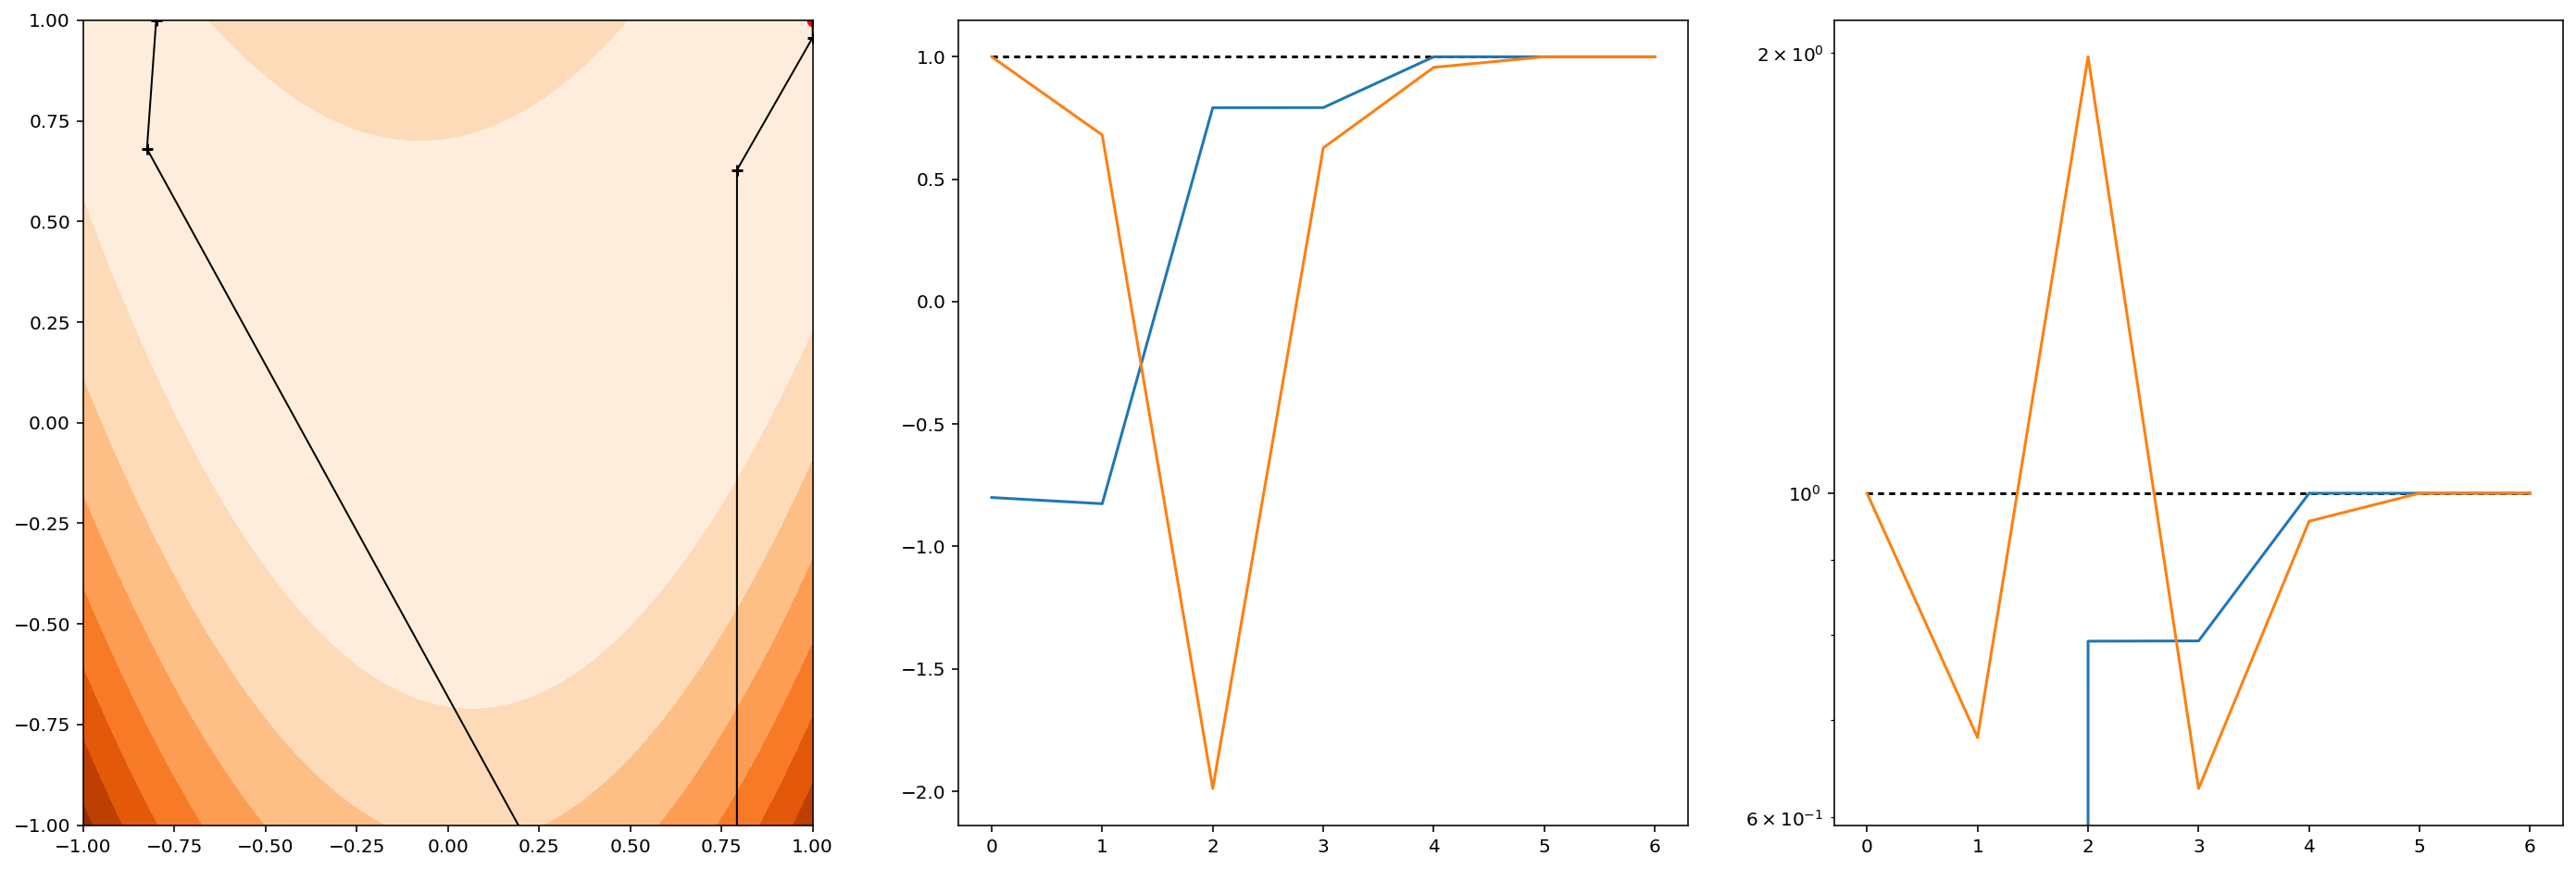

In [17]:
# Plotting
x_cap = 1
x_floor = -1
y_cap = 1
y_floor = -1
resolution = 100

fig = plt.figure(figsize=(24,8))
ax1 = fig.add_subplot(1,3,1)
ax1.axis([x_floor, x_cap, y_floor, y_cap])
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# Level sets
X, Y = np.meshgrid(np.linspace(x_floor,x_cap,resolution), \
                   np.linspace(y_floor,y_cap,resolution))
Z = np.empty(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = f(np.array([X[i,j],Y[i,j]]))
# Z = np.array(Z).reshape(X.shape)
ax1.contourf(X,Y,Z,cmap="Oranges")

# Descent
steps_x,steps_y = zip(*steps)
ax1.scatter(steps_x,steps_y,c="black",marker="+",linewidths=2)
ax1.plot(steps_x,steps_y,c="black",linewidth=1)
ax1.scatter(1,1,color="red",marker="o")

# Convergence
x_range = range(len(steps_x))

ax2.plot(x_range,np.full(len(steps_x),1),dashes=[2,2],c="black")
ax2.plot(x_range,np.full(len(steps_x),1),dashes=[2,2],c="black")
ax2.plot(x_range,steps_x)
ax2.plot(x_range,steps_y)

ax3.plot(x_range,np.full(len(steps_x),1),dashes=[2,2],c="black")
ax3.plot(x_range,np.full(len(steps_x),1),dashes=[2,2],c="black")
ax3.semilogy(x_range,steps_x)
ax3.semilogy(x_range,np.abs(steps_y))

plt.show()

In [18]:
# The Newton Method applied to Rosenbrock function
"""
The method does have a steplength parameter α 
it is implicitly set to  α=1  and so appears 'invisible'
"""
f = lambda x: 10*(x[1] - x[0]**2)**2 + (x[0] - 1)**2
grad_f = lambda x: [2*(x[0]-1) + 200*(x[1] - x[0]**2)*(-2*x[0]), 200*(x[1]-x[0]**2)]
hessian_f = lambda x: [[1200*x[0]**2-400*x[1]+2, -400*x[0]], [-400*x[0], 200]]

x1 = np.array([])
x2 = np.array([])
x = np.array([-.8,1])
tol = np.inf
k = 0
step = 1

while tol >= 1e-7:
    hessian_inv = np.linalg.inv(hessian_f(x))
    x_new = x - step * np.matmul(hessian_inv, grad_f(x))
    x1 = np.append(x1, x_new[0])
    x2 = np.append(x2, x_new[1])
    print(x_new)
    tol = np.linalg.norm(x_new - x, 2)
    x = x_new
    k+=1
    
print("\nFunction Value: ", f(x), "\nAt X = ", x, " after", k, "iterations")

[-0.82535211  0.68056338]
[ 0.79208505 -1.98870424]
[0.79248166 0.62802703]
[0.99999347 0.95692579]
[0.99999415 0.9999883 ]
[1. 1.]
[1. 1.]

Function Value:  0.0 
At X =  [1. 1.]  after 7 iterations


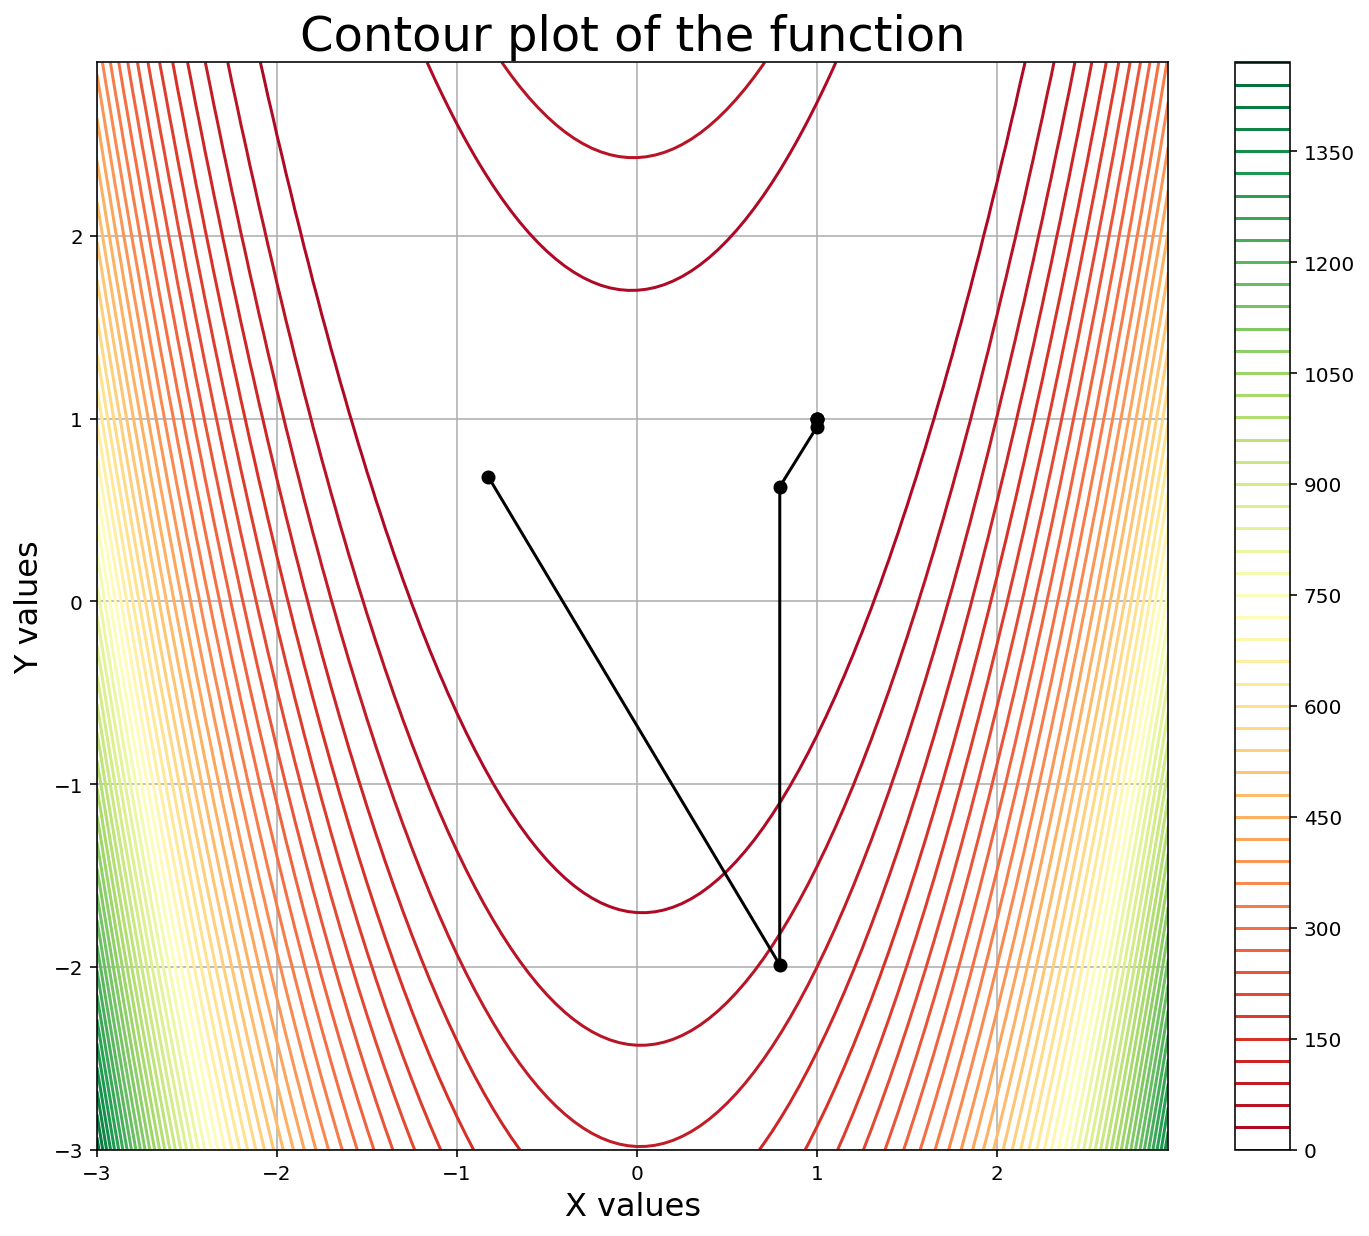

In [19]:
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)

X, Y = np.meshgrid(x, y)
Z = 10*(Y - X**2)**2 + (X - 1)**2

plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, 50,cmap='RdYlGn')
plt.plot(x1, x2, 'o-', color='black')
plt.xlabel('X values', fontsize=16)
plt.ylabel('Y values', fontsize=16)
plt.title('Contour plot of the function', fontsize=24)
plt.colorbar()
plt.grid(True)
plt.show()